# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

    This paper is about an aspect of data cleaning called tidy data, which generally refers to the structure of how a dataset is stored.
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

    The tidy data standard is intented to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together.
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

    The first sentence refers to the fact that all datasets are unique, both in the information they store as well as how they store it. Basically no data is perfect for analysis without cleaning, but the problems with the data will vary dataset to dataset. The second sentence refers to how because each dataset is unique, it is very hard to define observations and variables in a way that will apply to every single dataset. However, within the scope of a single dataset, it is relatively simple to separate what data are variables, and which are observations.
  4. Read Section 2.2. How does Wickham define values, variables, and observations?

    Values are defined as what composes a dataset, usually numbers or strings. Variables are defined as something that contains all values that measure the same underlying attribute across units. Observations are defined as something that contains all values measured on the same unit across attributes
  5. How is "Tidy Data" defined in section 2.3?

    Tidy Data is defined as a standard way of mapping the meaning of a dataset to its structure.
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

    The 5 most common problems with messy datasets are: column headers are values, not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiple types of observational units are stored in the same table; a single observational unit is stored in multiple tables. "Melting" a dataset is when columns are turned into rows.
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

    Table 12 separates each observation (day) into a row whereas table 11 has each day as a column. One result of this is the large number of null or empty cells in table 11, whereas table 12 is much more organized with the non-existant observations excluded.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  
    The chicken-and-egg problem is the idea that if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. Wickham hopes that in the future others will build on the tidy data framework to develop even better data storage strategies and better tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?).

  I cleaned the price variable first by removing commas from prices that go over 999 dollars. This allowed my next step of cleaning, which was converting the column type to numeric, making future operations much more convenient. Following this cleaning, the Price column had 0 missing values.
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

  The type variable is already fairly clean, with no null values and the observations split between two variables: provoked and unprovoked. I concluded no cleaning other than changing the column to type to str was required. While creating a dummy variable is possible, considering that it isn't intuitive to associate 1 and 0 with either provoked or unprovoked I decided against creating a dummy variable.

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

  To clean the released variable I ensured it followed the rules of dummy variables, only containing numerical values 1 or 0 - 1 indicated release and 0 indicating no release - and replaced all unknown values (originally represented by 9) with np.nan. I also checked the original dataframe and confirmed that the only values it contained for this variable were 1, 0, or 9, all of which I accounted for.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

  I used the sentence type to determine what the empty values of the imposed sentence should be changed to - sentence type of 4 meant imposed sentence should be 0, whereas a sentence type of 9 should correspond to NaN. I then changed the imposed sentence from an object type to type float64.

In [69]:
import pandas as pd
import numpy as np

#Q2.1
airbnb_df = pd.read_csv('./hw_data/airbnb_hw.csv')

price = airbnb_df['Price']
clean_commas = price.str.replace(',', '')
numeric_df = clean_commas.apply(pd.to_numeric)

airbnb_df['Price'] = numeric_df

# print(airbnb_df['Price'][:105])
# print("price null values: ", airbnb_df['Price'].isnull().sum())

#Q2.2
shark_df = pd.read_csv('./hw_data/sharks.csv')
types = shark_df['Type']
shark_df['Type'] = shark_df['Type'].astype(str)

test = types.isin(['Provoked', 'Unprovoked'])
print(shark_df['Type'])
#print(test)

#Q2.3
trial_df = pd.read_csv('./hw_data/VirginiaPretrialData2017.csv')
released = trial_df['WhetherDefendantWasReleasedPretrial']

test3 = trial_df.loc[trial_df['WhetherDefendantWasReleasedPretrial'].isin([0, 1, 9])]
strdf = released.replace(9, np.nan)

trial_df['WhetherDefendantWasReleasedPretrial'] = strdf

# print(trial_df['WhetherDefendantWasReleasedPretrial'])
# print(test3['WhetherDefendantWasReleasedPretrial'])

#Q2.4
imposed_sentence = trial_df['ImposedSentenceAllChargeInContactEvent']
sentence_type = trial_df['SentenceTypeAllChargesAtConvictionInContactEvent']

fix_four = trial_df.loc[trial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'] = '0.0'
fix_nan = trial_df.loc[trial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = np.nan

numeric_switch = trial_df['ImposedSentenceAllChargeInContactEvent'].apply(pd.to_numeric)
trial_df['ImposedSentenceAllChargeInContactEvent'] = numeric_switch

# print(trial_df['ImposedSentenceAllChargeInContactEvent'])



<ipython-input-69-d872ad3d2fba>:17: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  shark_df = pd.read_csv('./hw_data/sharks.csv')


0       Unprovoked
1         Provoked
2       Unprovoked
3       Unprovoked
4       Unprovoked
           ...    
6457    Unprovoked
6458    Unprovoked
6459    Unprovoked
6460    Unprovoked
6461    Unprovoked
Name: Type, Length: 6462, dtype: object


<ipython-input-69-d872ad3d2fba>:26: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

  There are 5 rows and 63 columns in this data set, meaning there are 315 observations. There are 63 columns meaning 63 variables, including: index, unitid, chronname, cite, state, level, control, basic, hbcu, flagship, and vsa_grad_after6_transfer.
3. Cross tabulate `control` and `level`. Describe the patterns you see.

  I can see that there are overall more 4 year colleges than 2 year, and that the disparity between 2 and 4 year colleges is greatest when the colleges are private not-for-profit.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

  Looking at the plot, one can see that 2-year pubic colleges have by far the highest graduation rate. The other variable groups are significantly lower, with 4-year public and 4-year private-for-profit standing below 2-year public colleges but above the rest of the variables, while the other three variables are all close together lower than the rest. When looking at the grouped statistical analysis, one can conclude that 4-year private not-for-profit and 2-year private not-for-profit both have the best graduation rate when looking at the mean and median as compared to other institutions.

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

  When looking at this plot, one can conclude that 2-year public institutions have by far the best graduation rate, with 4-year public and 4-year private not-for-profit are relatively equal to each other below 2-year public but above other institutions, with 2-year private not-for-profit standing out as by far the lowest graduation rate.

7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

  The bi-modal nature can be explained by different institutions peaking at different values, meaning when all other variables are combined together it creates two peaks, with different instiutions pulling the average up at different points. This can be seen when grouping the graph as the separate spike 4-year private not-for-profit explains the small secondary peak in the combined graph. This is further backed up in the statistical analysis, where the mean and median for 4-year private not-for-profit is significantly different than all other institutions.


8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

  The easiest pattern to see is how 2-year colleges have far less aid the 4-year coleges have, with the general pattern appearing to be positive and linear, meaning more aid meant higher graduation rates. Aid seems to increae graduation rates the most for private institutions, both for-profit and not-for-profit.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

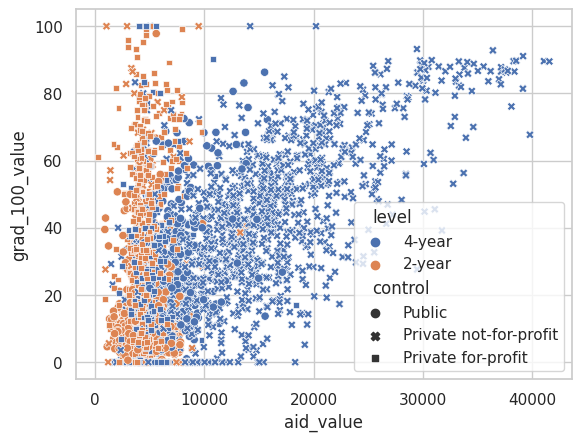

In [34]:
from pandas._libs.tslibs import ccalendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ccdf = pd.read_csv('./hw_data/college_completion.csv')
# print(ccdf.head())
cross_tabulate = pd.crosstab(ccdf.control, ccdf.level)

grad100 = ccdf['grad_100_value']
sns.histplot(data = ccdf, x = grad100, multiple = "stack") #histogram
sns.kdeplot(data = ccdf, x=grad100, multiple="stack") #kernel density plot
sns.boxplot(x = grad100) #boxplot
print(grad100.describe()) #statistical description

pdplot = ccdf.groupby(["level", "control"])['grad_100_value'].plot.kde()  #grouped grad kde plot
plt.legend(title='Level & Control')

grad100grouped = ccdf.groupby(["level", "control"])['grad_100_value'].describe()
# print(grouped)

ccdf['levelXcontrol'] = ccdf['level']+', '+ccdf['control']  #levelXcontrol plot
sns.kdeplot(data = ccdf, x = ccdf['grad_100_value'], hue = ccdf['levelXcontrol'])

aidvalue = ccdf['aid_value']
sns.kdeplot(data = ccdf, x = aidvalue)
aidplot = ccdf.groupby(['level', 'control'])['aid_value'].plot.kde()  #grouped aid kde plot
plt.legend(title = 'level & control')
aidGrouped = ccdf.groupby(["level", "control"])["aid_value"].describe()
print(aidGrouped)

sns.scatterplot(data = ccdf, x = "aid_value", y = "grad_100_value") #aid vs grad scatterplot
sns.scatterplot(data = ccdf, x = "aid_value", y = "grad_100_value", hue = 'level', style = 'control') #grouped aid vs grad plot




**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.